In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
5,CH,36.0,6,4.0,6.0,7.0,3.0,8.0,7.0,4.0,2.0,NaN,2.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0


In [3]:
df = df[['cntry', 'year', 'tvtot', 'pplfair', 'ppltrst', 'happy', 'sclmeet', 'sclact',
         'gndr', 'agea', 'partner']]
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(8594, 11)
(8160, 11)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

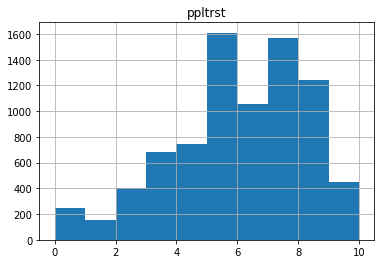

In [4]:
df.hist('ppltrst')
plt.show()

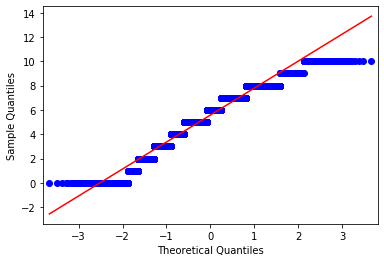

(0.9554449319839478, 2.6624670822171524e-44)
NormaltestResult(statistic=319.4408604085738, pvalue=4.308226374124743e-70)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [5]:
# qq plot for normality testing, shapiro-wilk and d'agostino as well
import statsmodels.api as sm
import scipy.stats as stats

sm.qqplot(df.ppltrst, line = 's')
plt.show()

print(stats.shapiro(df.ppltrst))
print(stats.normaltest(df.ppltrst))

In [6]:
# data is not normal enough, so we'll use kruskal-wallace

for country in df.cntry.unique():
    print(country)
    # printing the difference of the means of each year
    print(df[(df.cntry == country) & (df.year == 6)].ppltrst.mean() -
          df[(df.cntry == country) & (df.year == 7)].ppltrst.mean())
    #printing the kruskal-wallace results
    print(stats.kruskal(df[(df.cntry == country) & (df.year == 6)].ppltrst,
                 df[(df.cntry == country) & (df.year == 7)].ppltrst))

CH
-0.08097587487766678
KruskalResult(statistic=0.3539253917423661, pvalue=0.5518994279634226)
CZ
0.04384174678502095
KruskalResult(statistic=0.0007002741025725016, pvalue=0.9788882901190443)
DE
-0.2802197802197801
KruskalResult(statistic=0.11943127962085082, pvalue=0.7296521329635768)
ES
0.19508920995854684
KruskalResult(statistic=6.569139099834788, pvalue=0.010376213081805846)
NO
0.05026586905948882
KruskalResult(statistic=0.23367321334404795, pvalue=0.628813471303737)
SE
-0.19655799531123463
KruskalResult(statistic=4.455080702287295, pvalue=0.034797571950332534)


The only countries that changed were Sweden and Norway, which became about 2% less trusting and about 2% more trusting, respectively.

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

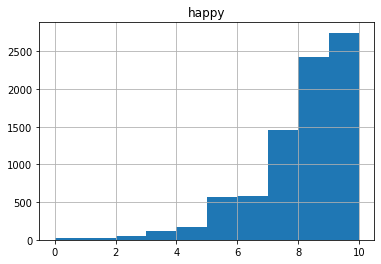

In [7]:
df.hist('happy')
plt.show()

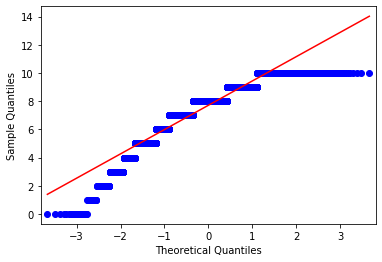

(0.9001486301422119, 0.0)
NormaltestResult(statistic=1433.6539522888086, pvalue=0.0)


In [8]:
# qq plot for normality testing, shapiro-wilk and d'agostino as well
sm.qqplot(df.happy, line = 's')
plt.show()

print(stats.shapiro(df.happy))
print(stats.normaltest(df.happy))

In [9]:
# data is not normal at all, so we'll use kruskal-wallace

for country in df.cntry.unique():
    print(country)
    # printing the difference of the means of each year
    print(df[(df.cntry == country) & (df.year == 6)].happy.mean() -
          df[(df.cntry == country) & (df.year == 7)].happy.mean())
    #printing the kruskal-wallace results
    print(stats.kruskal(df[(df.cntry == country) & (df.year == 6)].happy,
                 df[(df.cntry == country) & (df.year == 7)].happy))

CH
-0.06353799628731238
KruskalResult(statistic=0.8144371317898296, pvalue=0.3668116545667873)
CZ
-0.13484198994046803
KruskalResult(statistic=0.8485635655607799, pvalue=0.3569590159224376)
DE
-0.5494505494505493
KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717)
ES
0.11401693292283799
KruskalResult(statistic=3.1053804194521, pvalue=0.07803399877134606)
NO
0.3354579119783505
KruskalResult(statistic=18.28380588098981, pvalue=1.9031819650986455e-05)
SE
-0.03789236224738879
KruskalResult(statistic=0.09922997798543272, pvalue=0.7527556545632833)


Happiness only changed in Sweden, where it went up by about 3%.

### 3. Who reported watching more TV in 2012, men or women?

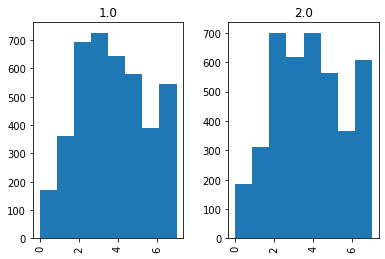

In [10]:
df.hist('tvtot', by = 'gndr', bins = 8)
plt.show()

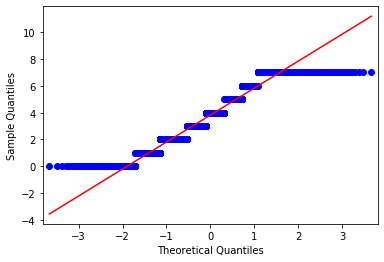

(0.9436274170875549, 0.0)
NormaltestResult(statistic=1498.2256220526626, pvalue=0.0)


In [11]:
# qq plot for normality testing, shapiro-wilk and d'agostino as well.
# genders look about the same on the above plot, so I'll keep them together
# for these normality tests

sm.qqplot(df.tvtot, line = 's')
plt.show()

print(stats.shapiro(df.tvtot))
print(stats.normaltest(df.tvtot))

In [12]:
# data is not normal, so we'll use kruskal-wallace

for country in df.cntry.unique():
    print(country)
    # printing the difference of the means of each gender
    print(df[(df.cntry == country) & (df.year == 6) & (df.gndr == 1.0)].tvtot.mean() -
          df[(df.cntry == country) & (df.year == 6) & (df.gndr == 2.0)].tvtot.mean())
    #printing the kruskal-wallace results
    print(stats.kruskal(df[(df.cntry == country) & (df.year == 6) & (df.gndr == 1.0)].tvtot,
                        df[(df.cntry == country) & (df.year == 6) & (df.gndr == 2.0)].tvtot))

CH
0.15105888660530775
KruskalResult(statistic=1.1087558920112224, pvalue=0.29235254994597826)
CZ
-0.2179207920792079
KruskalResult(statistic=3.637790117510048, pvalue=0.05648185784931046)
DE
0.4500000000000002
KruskalResult(statistic=0.3692307692307756, pvalue=0.5434238636256659)
ES
-0.08985106837100076
KruskalResult(statistic=0.5351582601478289, pvalue=0.46444625639819936)
NO
-0.19182027649769573
KruskalResult(statistic=2.022606665899402, pvalue=0.15497291010032307)
SE
0.10740837354897614
KruskalResult(statistic=0.9703419199787089, pvalue=0.32459491985331324)


No countries appeared to have had a difference between the genders in tv watching time in 2012.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

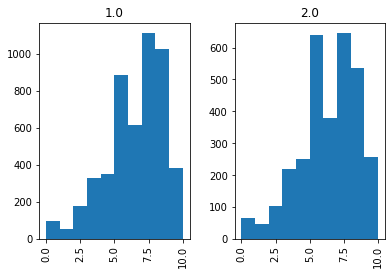

In [13]:
df.hist('pplfair', by = 'partner', bins = 10)
plt.show()

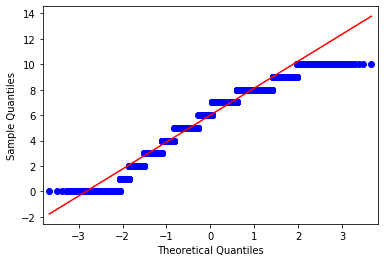

(0.9477363228797913, 0.0)
NormaltestResult(statistic=442.99518542295016, pvalue=6.379956690095304e-97)


In [14]:
# qq plot for normality testing, shapiro-wilk and d'agostino as well.
# groups look about the same on the above plot, so I'll keep them together
# for these normality tests

sm.qqplot(df.pplfair, line = 's')
plt.show()

print(stats.shapiro(df.pplfair))
print(stats.normaltest(df.pplfair))

In [15]:
# data is not normal, so we'll use kruskal-wallace

for country in df.cntry.unique():
    print(country)
    # printing the difference of the means of each group
    print(df[(df.cntry == country) & (df.year == 6) & (df.partner == 1.0)].pplfair.mean() -
          df[(df.cntry == country) & (df.year == 6) & (df.partner == 2.0)].pplfair.mean())
    #printing the kruskal-wallace results
    print(stats.kruskal(df[(df.cntry == country) & (df.year == 6) &
                           (df.partner == 1.0)].pplfair,
                        df[(df.cntry == country) & (df.year == 6) &
                           (df.partner == 2.0)].pplfair))

CH
0.34135875262054505
KruskalResult(statistic=3.2587913930191736, pvalue=0.07104146930755015)
CZ
0.10016643800184433
KruskalResult(statistic=0.3252603346369522, pvalue=0.5684633939341801)
DE
2.0999999999999996
KruskalResult(statistic=4.645750708215298, pvalue=0.031130518292853578)
ES
-0.08936915702803994
KruskalResult(statistic=0.009195221172751547, pvalue=0.9236065740377544)
NO
0.15072326047935825
KruskalResult(statistic=0.8573661284869526, pvalue=0.3544768129442234)
SE
0.3592768369298014
KruskalResult(statistic=6.987269805195171, pvalue=0.00820914789413998)


In Denmark, people who live with their partners are about 18% percent more likely to believe that people are fair, and people in Norway who live with their partners are about 3% more likely to believe that people are fair if they live with an SO.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

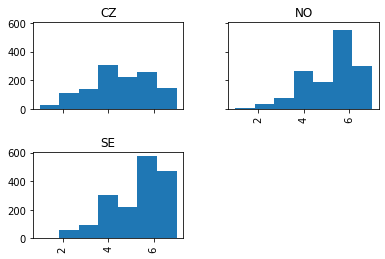

In [25]:
# making a new df with the Czech Republic, Norway, and Sweden, and only 2014
df2 = df.copy()
df2.drop(df2[(df2.cntry == 'CH') | (df2.cntry == 'DE') | (df2.cntry == 'ES') & (df2.year == 6)].index, inplace = True)
df2.hist('sclmeet', by = 'cntry', bins = 7, sharex = True, sharey = True)
plt.show()

CZ


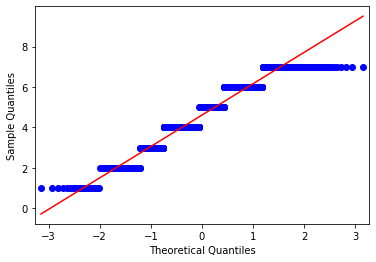

(0.9381869435310364, 5.099318060383662e-22)
NormaltestResult(statistic=73.06424562656446, pvalue=1.3623874990239444e-16)
NO


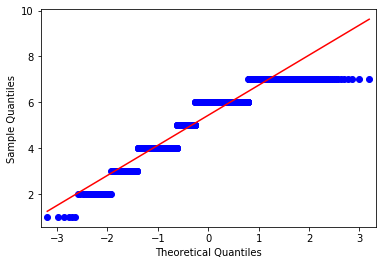

(0.8767155408859253, 4.023118542366534e-32)
NormaltestResult(statistic=112.72966003365097, pvalue=3.319444029879727e-25)
SE


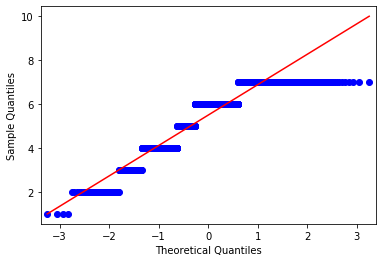

(0.8715953826904297, 1.7383173725761524e-35)
NormaltestResult(statistic=140.75630181395752, pvalue=2.7236883583127273e-31)


In [27]:
# qq plot for normality testing, shapiro-wilk and d'agostino as well.

for country in ('CZ', 'NO', 'SE'):
    print(country)
    sm.qqplot(df2[df2.cntry == country].sclmeet, line = 's')
    plt.show()

    print(stats.shapiro(df2[df2.cntry == country].sclmeet))
    print(stats.normaltest(df2[df2.cntry == country].sclmeet))

In [42]:
# data is not normal, so we'll use kruskal-wallace

for country in df2.cntry.unique():
    print(country)
    # printing the difference of the means for each country against the mean of the other two
    print(df2[df2.cntry == country].sclmeet.mean() - df2[df2.cntry != country].sclmeet.mean())
    
print('CZ and NO: ', stats.kruskal(df2[df2.cntry == 'CZ'].sclmeet,
                                   df2[df2.cntry == 'NO'].sclmeet))

print('CZ and SE: ', stats.kruskal(df2[df2.cntry == 'CZ'].sclmeet,
                                   df2[df2.cntry == 'SE'].sclmeet))

print('NO and SE: ', stats.kruskal(df2[df2.cntry == 'NO'].sclmeet,
                                   df2[df2.cntry == 'SE'].sclmeet))

CZ
-0.8511163192302948
NO
0.31000446794786196
SE
0.4286235684629771
CZ and NO:  KruskalResult(statistic=192.55508769470427, pvalue=8.802979041130981e-44)
CZ and SE:  KruskalResult(statistic=233.3850531451788, pvalue=1.0892858121484736e-52)
NO and SE:  KruskalResult(statistic=3.2237142856977568, pvalue=0.07257877013616403)


It appears Swedes and Norwegians meet more than Czechs.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

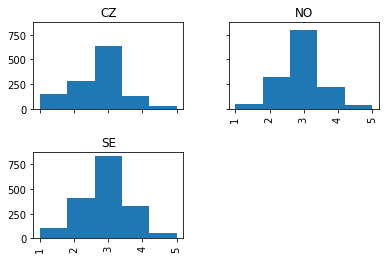

In [32]:
df2.hist('sclact', by = 'cntry', bins = 5, sharex = True, sharey = True)
plt.show()

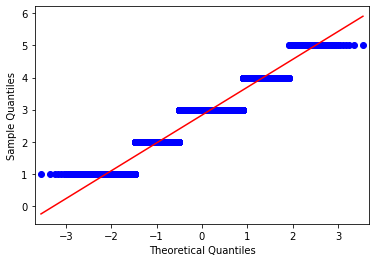

(0.8775469660758972, 0.0)
NormaltestResult(statistic=8.079534631289295, pvalue=0.017601567548566458)


In [33]:
# qq plot for normality testing, shapiro-wilk and d'agostino as well.
# groups look about the same on the above plot, so I'll keep them together
# for these normality tests

sm.qqplot(df.sclact, line = 's')
plt.show()

print(stats.shapiro(df.sclact))
print(stats.normaltest(df.sclact))

In [37]:
# differences of each respondent's sclact againts others of their age
scl_act_dif = []
for i in range(len(df2)):
    age = df2.iloc[i].agea
    mean = df2[df2.agea == age].sclact.mean()
    scl_act_dif.append(df2.iloc[i].sclact - mean)
    
df2['scl_act_dif'] = scl_act_dif

In [41]:
# data is normal enough, so we'll use ANOVA

for country in df2.cntry.unique():
    print(country)
    # printing the difference of the means for each country against the mean of the other two
    print(df2[df2.cntry == country].scl_act_dif.mean() -
          df2[df2.cntry != country].scl_act_dif.mean())

print('ANOVA: ', stats.f_oneway(df2[df2.cntry == 'CZ'].scl_act_dif,
                                df2[df2.cntry == 'NO'].scl_act_dif,
                                df2[df2.cntry == 'SE'].scl_act_dif))
    
print('CZ and NO: ', stats.kruskal(df2[df2.cntry == 'CZ'].scl_act_dif,
                                   df2[df2.cntry == 'NO'].scl_act_dif))

print('CZ and SE: ', stats.kruskal(df2[df2.cntry == 'CZ'].scl_act_dif,
                                   df2[df2.cntry == 'SE'].scl_act_dif))

print('NO and SE: ', stats.kruskal(df2[df2.cntry == 'NO'].scl_act_dif,
                                   df2[df2.cntry == 'SE'].scl_act_dif))

CZ
-0.21937929522967564
NO
0.11106599908394402
SE
0.08184888084528003
ANOVA:  F_onewayResult(statistic=29.886738432736486, pvalue=1.2841094700386183e-13)
CZ and NO:  KruskalResult(statistic=31.268123762716776, pvalue=2.247395713515699e-08)
CZ and SE:  KruskalResult(statistic=22.667187536922675, pvalue=1.9262937782607533e-06)
NO and SE:  KruskalResult(statistic=1.1208894252077202, pvalue=0.2897270182893662)


Swedes and Norwegians also appear to take part in more social activities than Czechs.